<a href="https://colab.research.google.com/github/shahalam1111/House-Prices---Advanced-Regression-Techniques/blob/main/house_prediction_technique(Training).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
obj=df.isnull().sum()
for key,value in obj.items():
  print(key, ", ",value)

Id ,  0
MSSubClass ,  0
MSZoning ,  0
LotFrontage ,  259
LotArea ,  0
Street ,  0
Alley ,  1369
LotShape ,  0
LandContour ,  0
Utilities ,  0
LotConfig ,  0
LandSlope ,  0
Neighborhood ,  0
Condition1 ,  0
Condition2 ,  0
BldgType ,  0
HouseStyle ,  0
OverallQual ,  0
OverallCond ,  0
YearBuilt ,  0
YearRemodAdd ,  0
RoofStyle ,  0
RoofMatl ,  0
Exterior1st ,  0
Exterior2nd ,  0
MasVnrType ,  872
MasVnrArea ,  0
ExterQual ,  0
ExterCond ,  0
Foundation ,  0
BsmtQual ,  37
BsmtCond ,  37
BsmtExposure ,  38
BsmtFinType1 ,  37
BsmtFinSF1 ,  0
BsmtFinType2 ,  38
BsmtFinSF2 ,  0
BsmtUnfSF ,  0
TotalBsmtSF ,  0
Heating ,  0
HeatingQC ,  0
CentralAir ,  0
Electrical ,  1
1stFlrSF ,  0
2ndFlrSF ,  0
LowQualFinSF ,  0
GrLivArea ,  0
BsmtFullBath ,  0
BsmtHalfBath ,  0
FullBath ,  0
HalfBath ,  0
BedroomAbvGr ,  0
KitchenAbvGr ,  0
KitchenQual ,  0
TotRmsAbvGrd ,  0
Functional ,  0
Fireplaces ,  0
FireplaceQu ,  690
GarageType ,  81
GarageYrBlt ,  81
GarageFinish ,  81
GarageCars ,  0
GarageArea

<Axes: >

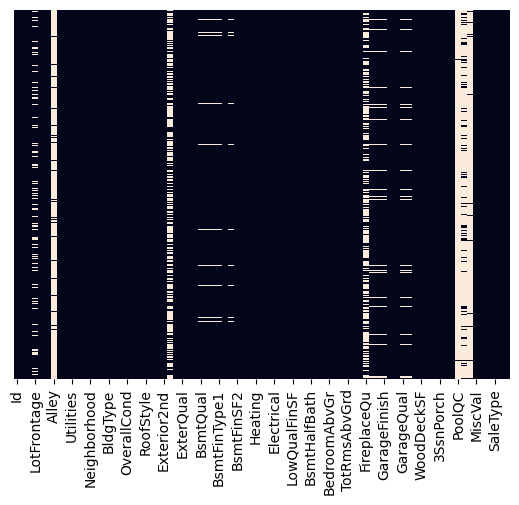

In [ ]:
#this function helps us to show all the null values using heatmaps
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [ ]:
##Fill missing Values
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [ ]:
df.drop(['Alley'],axis=1,inplace=True)

In [ ]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [ ]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [ ]:
df.drop(['GarageYrBlt'], axis=1, inplace=True)

In [ ]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [ ]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1, inplace=True)

In [ ]:
df.drop(['Id'], axis=1,inplace=True)

In [ ]:
df.drop(['MasVnrType'], axis=1, inplace=True)

In [ ]:
df.shape

(1460, 74)

In [ ]:
obj=df.isnull().sum()
for key,value in obj.items():
  print(key, ", ",value)

MSSubClass ,  0
MSZoning ,  0
LotFrontage ,  0
LotArea ,  0
Street ,  0
LotShape ,  0
LandContour ,  0
Utilities ,  0
LotConfig ,  0
LandSlope ,  0
Neighborhood ,  0
Condition1 ,  0
Condition2 ,  0
BldgType ,  0
HouseStyle ,  0
OverallQual ,  0
OverallCond ,  0
YearBuilt ,  0
YearRemodAdd ,  0
RoofStyle ,  0
RoofMatl ,  0
Exterior1st ,  0
Exterior2nd ,  0
MasVnrArea ,  0
ExterQual ,  0
ExterCond ,  0
Foundation ,  0
BsmtQual ,  0
BsmtCond ,  0
BsmtExposure ,  38
BsmtFinType1 ,  37
BsmtFinSF1 ,  0
BsmtFinType2 ,  38
BsmtFinSF2 ,  0
BsmtUnfSF ,  0
TotalBsmtSF ,  0
Heating ,  0
HeatingQC ,  0
CentralAir ,  0
Electrical ,  1
1stFlrSF ,  0
2ndFlrSF ,  0
LowQualFinSF ,  0
GrLivArea ,  0
BsmtFullBath ,  0
BsmtHalfBath ,  0
FullBath ,  0
HalfBath ,  0
BedroomAbvGr ,  0
KitchenAbvGr ,  0
KitchenQual ,  0
TotRmsAbvGrd ,  0
Functional ,  0
Fireplaces ,  0
FireplaceQu ,  0
GarageType ,  0
GarageFinish ,  0
GarageCars ,  0
GarageArea ,  0
GarageQual ,  0
GarageCond ,  0
PavedDrive ,  0
WoodDeckSF ,

In [ ]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

In [ ]:
df.shape

(1460, 74)

In [ ]:
obj=df.isnull().sum()
for key,value in obj.items():
  print(key, ", ",value)

MSSubClass ,  0
MSZoning ,  0
LotFrontage ,  0
LotArea ,  0
Street ,  0
LotShape ,  0
LandContour ,  0
Utilities ,  0
LotConfig ,  0
LandSlope ,  0
Neighborhood ,  0
Condition1 ,  0
Condition2 ,  0
BldgType ,  0
HouseStyle ,  0
OverallQual ,  0
OverallCond ,  0
YearBuilt ,  0
YearRemodAdd ,  0
RoofStyle ,  0
RoofMatl ,  0
Exterior1st ,  0
Exterior2nd ,  0
MasVnrArea ,  0
ExterQual ,  0
ExterCond ,  0
Foundation ,  0
BsmtQual ,  0
BsmtCond ,  0
BsmtExposure ,  0
BsmtFinType1 ,  0
BsmtFinSF1 ,  0
BsmtFinType2 ,  0
BsmtFinSF2 ,  0
BsmtUnfSF ,  0
TotalBsmtSF ,  0
Heating ,  0
HeatingQC ,  0
CentralAir ,  0
Electrical ,  0
1stFlrSF ,  0
2ndFlrSF ,  0
LowQualFinSF ,  0
GrLivArea ,  0
BsmtFullBath ,  0
BsmtHalfBath ,  0
FullBath ,  0
HalfBath ,  0
BedroomAbvGr ,  0
KitchenAbvGr ,  0
KitchenQual ,  0
TotRmsAbvGrd ,  0
Functional ,  0
Fireplaces ,  0
FireplaceQu ,  0
GarageType ,  0
GarageFinish ,  0
GarageCars ,  0
GarageArea ,  0
GarageQual ,  0
GarageCond ,  0
PavedDrive ,  0
WoodDeckSF ,  0

# **Handle Categorical Features**

In [ ]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [ ]:
len(columns)

38

In [ ]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:

        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)

        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:

            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1


    df_final=pd.concat([final_df,df_final],axis=1)

    return df_final

In [ ]:
main_df=df.copy()

In [ ]:
## Combine Test Data

test_df=pd.read_csv('formulatedtest.csv')

In [ ]:
test_df.shape

(1459, 73)

In [ ]:
final_df=pd.concat([df,test_df],axis=0)

In [ ]:
final_df.shape

(2919, 74)

In [ ]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [ ]:
final_df.shape

(2919, 233)

In [ ]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [ ]:
final_df.shape

(2919, 175)

Dividing into Test and Training datasets

In [ ]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [ ]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

<ipython-input-38-8fdc58f80b2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [ ]:
df_Test.shape

(1459, 174)

In [ ]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# Prediciton and selecting the Algorithm

In [ ]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))


In [ ]:
y_pred=classifier.predict(df_Test)

In [ ]:
y_pred

array([123830.43, 166489.62, 190223.9 , ..., 163632.86, 113834.72,
       240464.28], dtype=float32)

In [ ]:
#Create Sample submission file and submit
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)